In [1]:
#!/usr/local/bin/python

import os, sys
import json
import numpy as np
import matplotlib.pyplot as plt
import chainer
from chainer import cuda
from matplotlib import animation
from optparse import OptionParser

from elecpy.util.cmap_bipolar import bipolar
import elecpy.elecpy as elp

from matplotlib import animation, rc
from IPython.display import HTML

import time

%matplotlib inline

In [7]:
# load sample parameter
with open ('elecpy/temp/sim_params.json','r') as f:
    sim_params = json.load(f)

# modify parameters
sim_params['restart'] = {}
sim_params['restart']['source'] = "/mnt/recordings/SimulationResult/2018-02-01/"
sim_params['restart']['count'] = 0
sim_params['time']['end'] = 20
#sim_params["stimulation"]["extracellular"][0]["start"] = 0.
#sim_params["stimulation"]["extracellular"][0]["duration"] = 10.
sim_params["stimulation"] = {}
sim_params['time']['end'] = 1000
sim_params['log']['path'] = '/mnt/recordings/SimulationResult/20180506-1/'

print json.dumps(sim_params, indent=4)

{
    "cell_type": "mahajan", 
    "log": {
        "path": "/mnt/recordings/SimulationResult/20180506-1/", 
        "cnt": 1000
    }, 
    "stimulation": {}, 
    "time": {
        "end": 1000, 
        "udt": 0.001
    }, 
    "geometory": {
        "width": 200, 
        "ds": 0.015, 
        "height": 200
    }, 
    "restart": {
        "count": 0, 
        "source": "/mnt/recordings/SimulationResult/2018-02-01/"
    }
}


In [8]:
g = elp.sim_generator(sim_params)

outdir = sim_params['log']['path']
#sim_params['restart']['source']

if not os.path.exists(outdir) : os.makedirs(outdir)

In [9]:
out = []
while True:
    img = g.next()
    if img is False: break
    out.append(np.copy(img))

elecpy simulation start!
Stimulation settings ...done
Allocating data... ...done
Initializing data... ...done
Building PDE system ... ...done
Main loop start!
------------------0.0ms
------------------1.0ms
------------------2.0ms
------------------3.0ms
------------------4.0ms
------------------5.0ms
------------------6.0ms
------------------7.0ms
------------------8.0ms
------------------9.0ms
------------------10.0ms
------------------11.0ms
------------------12.0ms
------------------13.0ms
------------------14.0ms
------------------15.0ms
------------------16.0ms
------------------17.0ms
------------------18.0ms
------------------19.0ms
------------------20.0ms
------------------21.0ms
------------------22.0ms
------------------23.0ms
------------------24.0ms
------------------25.0ms
------------------26.0ms
------------------27.0ms
------------------28.0ms
------------------29.0ms
------------------30.0ms
------------------31.0ms
------------------32.0ms
------------------33.0ms
-

In [10]:
!ls -la /mnt/recordings/SimulationResult/

total 492
drwxrwxr-x    8 1001 1001   4096 May  6 12:12 .
drwxrwxr-x    6 1001 1001   4096 Jan 25 14:53 ..
drwxrwxr-x  403 1001 1001  40960 Jan 25 14:34 20170809-4
drwxrwxr-x 1003 1001 1001 106496 Jan 25 14:44 20170823-5
drwxrwxr-x 1002 1001 1001 110592 Jan 25 14:53 20170829-2
drwxr-xr-x    3 1001 1001   4096 Feb  1 10:55 20171128-1
drwxr-xr-x 1003 root root 114688 Feb  3 11:47 2018-02-01
drwxr-xr-x 1003 root root 114688 May  6 13:50 20180506-1


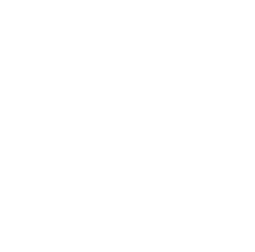

In [24]:
fig = plt.figure()
plt.axis('off')

ims = []
for img in out:
    im = plt.imshow(
        #img.reshape(200,200),
        img.reshape(200,200)[75:125, 100:150],
        vmin = -100.0, vmax = 20.0,
        cmap=bipolar(neutral=0, lutsize=1024),
        interpolation='nearest')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
HTML(ani.to_html5_video())